In [53]:
# import libraries
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import uniform
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import pandas as pd
import numpy as np

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [12]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.97883415 2.69118352 2.10708567 2.00255    2.30014321 2.32169175
 2.0432023  2.90738326 2.12804207 2.29227663]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [13]:
# your code here
def uni_dis(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    return bottom + (ceiling-bottom)*x

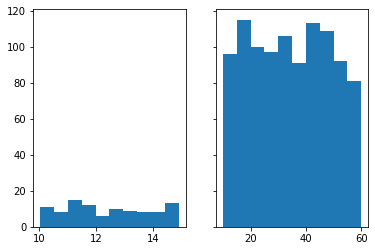

In [14]:
two_a = uni_dis(10, 15, 100)
two_b = uni_dis(10, 60, 1000)
fig, ax = plt.subplots(1,2, sharey = True)

ax[0].hist(two_a, bins=10)

ax[1].hist(two_b, bins=10);

How are the two distributions different?

In [15]:
# your answer below
"""
The frequency of items due to the size of the set (100 vs. 1000) is different as well as the range (10-15 vs 10-60).
"""

'\nThe frequency of items due to the size of the set (100 vs. 1000) is different as well as the range (10-15 vs 10-60).\n'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [16]:
# your code here
def normal_dis(avg, std_dev, count):
    return norm.rvs(size=count, loc = avg, scale = std_dev)
    

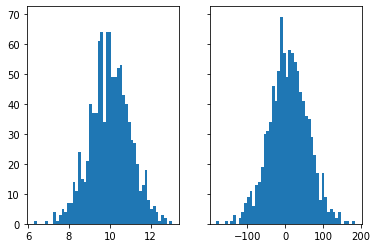

In [17]:
norm_dis3 = normal_dis(10, 1, 1000)
norm_dis4 = normal_dis(10, 50, 1000)

fig, ax = plt.subplots(1,2, sharey = True)
ax[0].hist(norm_dis3, bins=50)
ax[1].hist(norm_dis4, bins=50);

How are the two distributions different?

In [18]:
# your answer below
"""
The minimum and maximum values (range) are different
"""

'\nThe minimum and maximum values (range) are different\n'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.

In [19]:
# your code here
vehicles = pd.read_csv("vehicles.csv")

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Then plot the histograms for the following variables:

1. Fuel Barrels/Year

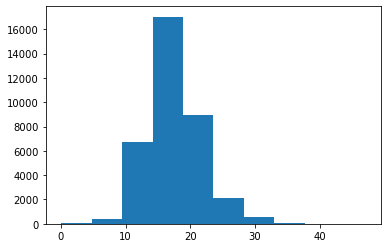

In [20]:
plt.hist(vehicles['Fuel Barrels/Year'], bins = 10);

2. CO2 Emission Grams/Mile 

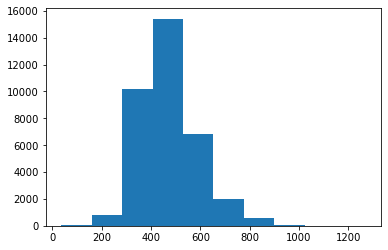

In [21]:
# your code here
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins = 10);
#qqplot(vehicles['CO2 Emission Grams/Mile'], line ='s')

3. Combined MPG

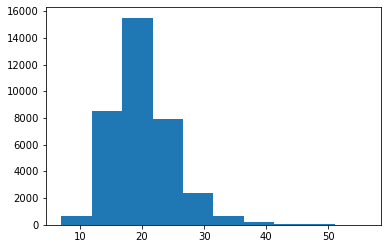

In [22]:
# your code here
plt.hist(vehicles['Combined MPG'], bins = 10);
#qqplot(vehicles['Combined MPG'], line='s')

Which one(s) of the variables are nearly normally distributed? How do you know?

In [27]:
# your answer here
#https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import anderson
# normality test
def check_normal(data):
    result = anderson(data)
    #print('Statistic: %.3f' % result.statistic)
    p = 0
#     for i in range(len(result.critical_values)):
#         sl, cv = result.significance_level[i], result.critical_values[i]
#         if result.statistic < result.critical_values[i]:
#             print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
#         else:
#             print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    # 5% confidence level
    sl, cv = result.significance_level[2], result.critical_values[2]
    if result.statistic < cv:
        return "Data looks Normal"
    else:
        return "Data does not look Normal"

print('Combined MPG:', check_normal(vehicles['Combined MPG']))
print('CO2 Emission Grams/Mile:', check_normal(vehicles['CO2 Emission Grams/Mile']))
print('Fuel Barrels/Year:', check_normal(vehicles['Fuel Barrels/Year']))


Combined MPG: Data does not look Normal
CO2 Emission Grams/Mile: Data does not look Normal
Fuel Barrels/Year: Data does not look Normal


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [47]:
# your code here
def exp_dis(size,scale = 10):
    return np.random.exponential(scale, size)

exp_dis1 = exp_dis(1)
exp_dis100 = exp_dis(100)

In [51]:
exp_dis100.mean()

10.848351864822172

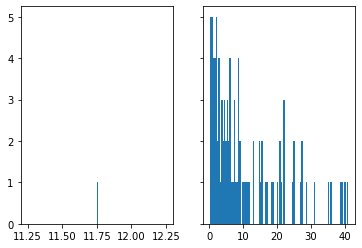

In [50]:
fig, ax = plt.subplots(1,2, sharey = True)
ax[0].hist(exp_dis1, bins=100)
ax[1].hist(exp_dis100, bins=100);

How are the two distributions different?

In [ ]:
# your answer here
""""
Since the size of the first one, it just approximates the mean of 10. 

The second one approximates an exponential distribution with a lot more samples, 
still with a mean of 10.
""""

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [57]:
# your answer here
# Hint: This is same as saying P(x<15)
#https://web.stanford.edu/class/archive/cs/cs109/cs109.1196/handouts/pythonForProbability.html
exp_rd = expon(1/10)
print(exp_rd.cdf(15))


0.9999996619256516


What is the probability that the customer will spend more than 15 minutes

In [55]:
# your answer here
1- exp_rd.cdf(15)

3.3807434840493755e-07